# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.12859999999999958, E_test is 0.19368729999999984
Average number of iterations is 3.329.


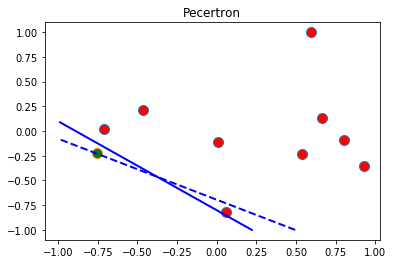

In [5]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 10 # number of training data

nTest = 10000 # number of testing data

avgIter = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    
    # Sum up number of iterations
    avgIter += iters

E_train = E_train/nRep 
E_test = E_test/nRep
avgIter = avgIter/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.25546999999999975, E_test is 0.26627729999999966
Average number of iterations is 31.538.


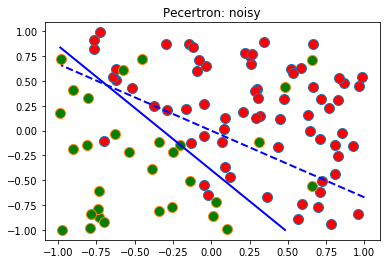

In [6]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data

nTest = 10000 # number of testing data

avgIter = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g, iters = perceptron(X, y)
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    
    # Sum up number of iterations
    avgIter += iters

E_train = E_train/nRep 
E_test = E_test/nRep
avgIter = avgIter/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron: noisy')


### Part3: Linear Regression

E_train is 0.03869000000000006, E_test is 0.047948199999999955


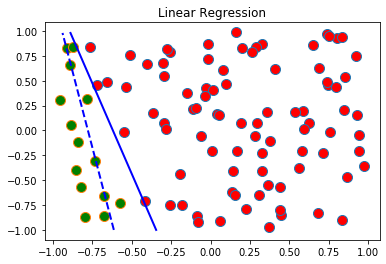

In [397]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data

nTest = 10000 # number of testing data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g= linear_regression(X, y)
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    

E_train = E_train/nRep 
E_test = E_test/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression')


## Part4: Linear Regression: noisy

E_train is 0.12993000000000016, E_test is 0.142028


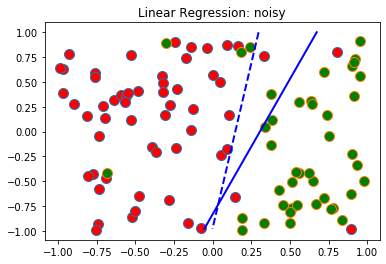

In [398]:

nRep = 1000 # number of replicates
nTrain = 100 # number of training data

nTest = 10000 # number of testing data

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g= linear_regression(X, y)
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    

E_train = E_train/nRep 
E_test = E_test/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [401]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
# Training error
y_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X))))
E_train = (y_pred != y).sum()/X.shape[1]

# Testing error
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
E_test = (y_test_pred != y_test).sum()/X_test.shape[1]

print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack((X, X[0,:]*X[1,:], X[0,:]*X[0,:], X[1,:]*X[1,:]))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test, X_test[0,:]*X_test[1,:], X_test[0,:]*X_test[0,:], X_test[1,:]*X_test[1,:]))  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
y_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t))))
E_train = (y_pred != y).sum()/X.shape[1]

# Testing error
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t))))
E_test = (y_test_pred != y_test).sum()/X_test.shape[1]


print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.03525469999999996, E_test is 0.04249977299999999


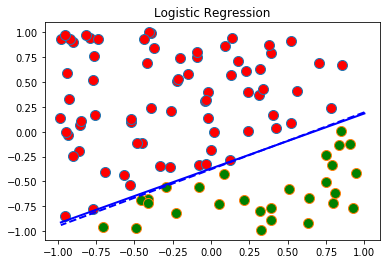

In [7]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of testing data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g = logistic(X, y);
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest

E_train = E_train/nRep 
E_test = E_test/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))


plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.14315254700000002, E_test is 0.15019199773000003


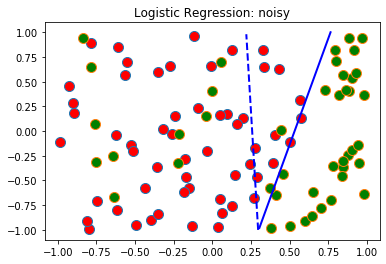

In [8]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of testing data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g = logistic(X, y);
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest

E_train = E_train/nRep 
E_test = E_test/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))


plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 1.2747454014315253e-07, E_test is 0.010763843044836179
Average number of support vectors is 3.091.


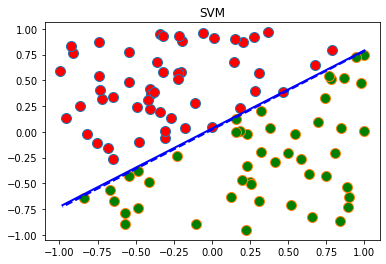

In [13]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000

avgNum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g, num_sc = svm(X, y)
    
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    
    # Sum up number of support vectors
    avgNum += num_sc

E_train = E_train/nRep 
E_test = E_test/nRep
avgNum = avgNum/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.45454014315254704, E_test is 0.45233617969199685
Average number of support vectors is 91.577.


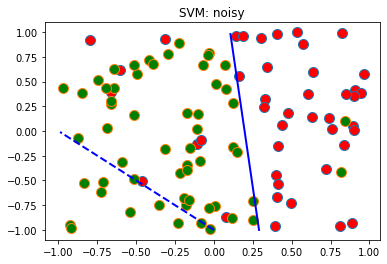

In [10]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000

avgNum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g, num_sc = svm(X, y)
    
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    
    # Sum up number of support vectors
    avgNum += num_sc

E_train = E_train/nRep 
E_test = E_test/nRep
avgNum = avgNum/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM: noisy')

E_train is 0.12747454014315254, E_test is 0.13894483617969203
Average number of support vectors is 51.1.


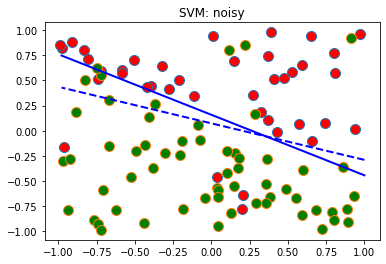

In [11]:
from svm import svm_slack
nRep = 1000; # number of replicates
nTrain = 100; # number of training data
nTest = 10000
avgNum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    X_test, y_test = X[:,0:nTest], y[:,0:nTest]
    X, y = X[:,nTest:], y[:,nTest:]
    w_g, num_sc = svm_slack(X, y)
    
    # Compute training, testing error
    
    # Training error
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))
    E_train += (y_pred != y).sum()/nTrain
    
    # Testing error
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    E_test += (y_test_pred != y_test).sum()/nTest
    
    # Sum up number of support vectors
    avgNum += num_sc

E_train = E_train/nRep 
E_test = E_test/nRep
avgNum = avgNum/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM: noisy')